# **Random Forest Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump
import numpy as np

In [2]:
X_train = pd.read_csv('../data/processed/train_test_madrid/Xtrain.csv')
X_test = pd.read_csv('../data/processed/train_test_madrid/Xtest.csv')

y_train = pd.read_csv('../data/processed/train_test_madrid/ytrain.csv')
y_test = pd.read_csv('../data/processed/train_test_madrid/ytest.csv')

In [3]:
X_test

,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N
0,15.666667,4,5,0,1
1,17.750000,4,2,0,1
2,19.333333,4,5,0,1
3,23.666667,4,5,0,0
4,22.916667,4,2,0,0
...,...,...,...,...,...
16175,28.406250,4,4,0,1
16176,2.625000,22,6,1,1
16177,36.583333,5,2,0,0
16178,7.166667,15,6,0,0


In [4]:
y_test

,PELIGROSIDAD_N
0,0
1,1
2,0
3,0
4,1
...,...
16175,0
16176,0
16177,2
16178,0


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Convertir el vector columna en un array 1D
y_train_1d = np.ravel(y_train)

model = RandomForestClassifier(random_state=23)

# Utilizar el array 1D en lugar del vector columna para ajustar el modelo
model.fit(X_train, y_train_1d)


# Define los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Convertir el vector columna en un array 1D
y_train_1d = np.ravel(y_train_1d)

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ejecuta la búsqueda grid
grid_search.fit(X_train, y_train_1d)

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Utiliza el mejor modelo para hacer predicciones en datos de prueba
predictions = best_model.predict(X_test)

Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Convertir el vector columna en un array 1D
y_train_1d = np.ravel(y_train)

# Inicializa un nuevo modelo RandomForestClassifier con los mejores hiperparámetros encontrados
best_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200, random_state= 23)

# Entrena el modelo con los datos de entrenamiento completos
best_model.fit(X_train, y_train_1d)

# Ahora puedes utilizar este modelo entrenado para hacer predicciones en nuevos datos
predictions = best_model.predict(X_test)

# También puedes evaluar el modelo en los datos de prueba, por ejemplo, calculando la precisión
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.999938195302843


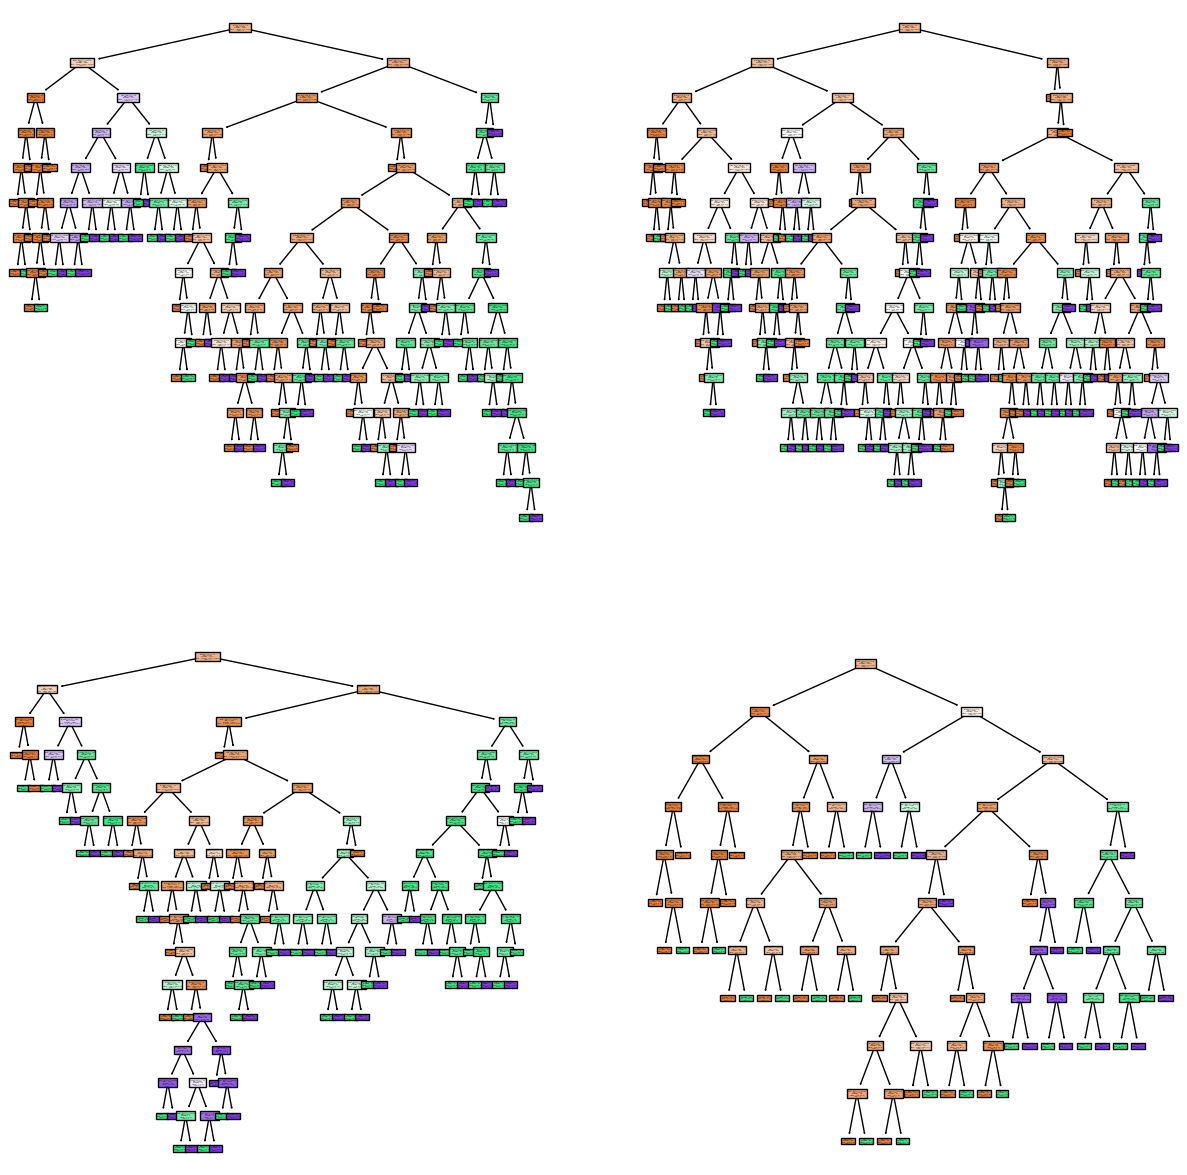

In [7]:
from sklearn import tree

fig, axis = plt.subplots (2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)

plt.show()

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 2, 0, 0])

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.999938195302843

In [10]:
y_pred = model.predict(X_train)
y_pred

array([0, 2, 0, ..., 0, 0, 0])

In [11]:
accuracy_score(y_train, y_pred)

1.0

In [11]:
dump(model, open("../models/RandomForestMadrid_23.pk", "wb"))